# Project 2 - Ames Housing Data and Kaggle Challenge

# 0.2 Test Data Cleaning

## Table of contents

- [1.Test Data Import & Cleaning](#1.-Test-Data-Import-&-Cleaning)<br>
In order to keep the test datasets as complete as posible, we will fill null values and impute values into the missing value cells.
 >[1.1 Lot Frontage](#1.1-Lot-Frontage)<br>
 >[1.2 Alley](#1.2-Alley)<br>
 >[1.3 Mas Vnr](#1.3-Mas-Vnr)<br>
 >[1.4 Basement](#1.4-Basement)<br>
 >[1.5 Electrical](#1.5-Electrical)<br>
 >[1.6 Fireplace Quality](#1.6-Fireplace-Quality)<br>
 >[1.7 Garage](#1.7-Garage)<br>
 >[1.8 Fence](#1.8-Fence)<br>
 >[1.9 Pool Qc](#1.9-Pool-QC)<br>
 >[1.10 Misc Feature](#1.10-Misc-Feature)<br>
- [2.Feature Engineering For Categorical Variables](#2.-Feature-Engineering-For-Categorical-Variables])

# 1. Test Data Import & Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

#to display all the columns in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

%matplotlib inline

In [2]:
test_df = pd.read_csv("../datasets/test.csv")

In [3]:
print(test_df.shape)

(879, 80)


In [4]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [6]:
test_df.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Sale Type           0
dtype: int64

> The Pool QC has the highest count of null values which is over 90% datas are missing, Miscellaneous features is second highest among the house feature with 838 of missing values, alley having 821 missing values, fence 707 missing values and fireplace quality has 422 missing values. But this cannot be explain as the data are missing, it can be explained that the house did not have the features. So below we will use different method to replace the null value into the nan cells.

In [7]:
na_features =[x for x in test_df.columns if test_df[x].isnull().sum()>1]
for x in na_features:
    print(x,np.round(test_df[x].isnull().mean(),4),' %')

Lot Frontage 0.182  %
Alley 0.934  %
Bsmt Qual 0.0284  %
Bsmt Cond 0.0284  %
Bsmt Exposure 0.0284  %
BsmtFin Type 1 0.0284  %
BsmtFin Type 2 0.0284  %
Fireplace Qu 0.4801  %
Garage Type 0.0501  %
Garage Yr Blt 0.0512  %
Garage Finish 0.0512  %
Garage Qual 0.0512  %
Garage Cond 0.0512  %
Pool QC 0.9954  %
Fence 0.8043  %
Misc Feature 0.9534  %


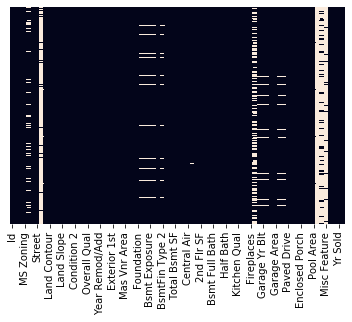

In [8]:
#Plot heatmap to see which features having null values, white color in the heatmap indicate the null values.
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False);

In [9]:
test_df.columns = test_df.columns.map(lambda x: x.replace(' ', '_'))
test_df.columns = test_df.columns.map(lambda x: x.lower())

In [10]:
test_df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

# 1.1 Lot Frontage
1. Identify the null value in lot frontage feature and fill with 'na' in the cells.

In [11]:
# https://www.gimme-shelter.com/frontage-50043/
# the lot frontage might be a main contributor to the price difference so considered to change null to median of same subclass and lot shape

test_df['lot_frontage'] = test_df.groupby(['ms_subclass','lot_shape'])['lot_frontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
# check if there is null remain in the Lot Frontage columns
test_df.loc[test_df['lot_frontage'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
188,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,2.5Unf,7,7,1922,2005,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,No,BLQ,474,Unf,0,634,1108,GasA,TA,N,FuseA,1160,908,0,2068,0,0,1,1,3,1,Gd,8,Typ,1,Gd,Detchd,1928.0,Unf,1,315,TA,TA,Y,0,0,60,0,0,0,NaN,NaN,NaN,0,5,2010,WD
205,757,903475100,70,RM,NaN,5775,Pave,NaN,IR2,Bnk,AllPub,Corner,Mod,OldTown,Feedr,Norm,1Fam,2Story,6,7,1915,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,483,483,GasA,Ex,Y,SBrkr,741,686,0,1427,0,0,1,0,3,1,Gd,7,Typ,0,NaN,Attchd,1915.0,Unf,1,379,TA,TA,Y,0,24,112,0,0,0,NaN,NaN,NaN,0,2,2009,WD


In [13]:
# seems that lot_frontage values are missing foe the 2 rows, in this case using median value to impute
test_df['lot_frontage'].fillna(test_df['lot_frontage'].median(),inplace=True)

# 1.2 Alley
1. Identify the null value in alley feature and fill with 'na' in the cells.

In [14]:
test_df['alley'].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

In [15]:
test_df['alley'].fillna('na',inplace=True)

In [16]:
test_df['alley'].isnull().sum()

0

# 1.3 Mas Vnr
1. Identify the null value in mas_vnr_type feature and fill with 'na' in the cells.
2. Identify the null value in mas_vnr_area feature and fill with 0 in the cells.
3. There are a few rows that the mas vnr is not available but having mas vnr area, filter out and replace the value to 0.

In [17]:
test_df['mas_vnr_type'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

In [18]:
test_df['mas_vnr_type'].fillna('None',inplace=True)

In [19]:
test_df['mas_vnr_area'].fillna(0.0,inplace=True)

In [20]:
test_df.loc[(test_df['mas_vnr_area']>0) & (test_df['mas_vnr_type']=='None')]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
383,442,528138010,20,RL,102.0,13514,Pave,na,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,None,285.0,Ex,TA,PConc,Ex,TA,No,GLQ,1142,Unf,0,632,1774,GasA,Ex,Y,SBrkr,1808,0,0,1808,1,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,850,TA,TA,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD
863,404,527451110,160,RM,24.0,2368,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,None,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD


In [21]:
test_df.iloc[[383],27] = test_df.iloc[[383],27].replace(285.0,0.0)
test_df.iloc[[863],27] = test_df.iloc[[863],27].replace(312.0,0.0)

# 1.4 Basement

1. Identify the null value in bsmt_exposure feature and fill with 'na' in the cells.
2. Identify the null value in bsmtfin_type_1,bsmtfin_type_2, bsmt_cond & bsmt_qual feature and fill with 'na' in the cells.
3. Identify the null value in bsmtfin_sf_1, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf feature and fill with 0 in the cells.

In [22]:
test_df.loc[(test_df['bsmt_exposure'].isnull()) & (test_df['bsmt_qual'].notnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type


In [23]:
test_df['bsmt_exposure'].isnull().sum()

25

In [24]:
test_df['bsmt_exposure'].fillna('na',inplace=True)

In [25]:
test_df['bsmtfin_type_1'].fillna('na',inplace=True)

In [26]:
test_df['bsmtfin_type_2'].fillna('na',inplace=True)

In [27]:
test_df.loc[test_df['bsmt_cond'].isnull()].shape

(25, 80)

In [28]:
test_df['bsmt_cond'].fillna('na',inplace=True)

In [29]:
test_df['bsmt_qual'].fillna('na',inplace=True)

# 1.5 Electrical

1. Identify the null value in electrical feature and in this case using mode to impute the value in.

In [30]:
test_df.loc[test_df['electrical'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
635,1578,916386080,80,RL,73.0,9735,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD


In [31]:
test_df['electrical'].mode()

0    SBrkr
dtype: object

In [32]:
test_df['electrical'].fillna('SBrkr',inplace=True)

# 1.6 Fireplace Quality

1.Identify the null value in fireplace_qu feature and fill with 'na in the cells.

In [33]:
test_df.loc[(test_df['fireplace_qu'].isnull()) & (test_df['fireplaces'] == 0)].shape

(422, 80)

In [34]:
test_df['fireplace_qu'].fillna('na',inplace=True)


# 1.7 Garage
1. Identify the null value in garage_type, garage_finish, garage_qual, garage_cond feature and fill with 'na' in the cells.
2. Identify the null value in garage_yr_blt, garage_cars feature and fill with 0 in the cells.

In [35]:
test_df.loc[(test_df['garage_type'].notnull()) & (test_df['garage_qual'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
765,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,na,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD


In [36]:
test_df.iloc[[765],[59]] = test_df.iloc[[765],[59]].replace('Detchd','na') 

In [37]:
test_df.iloc[[765] ]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
765,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,na,na,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD


In [38]:
test_df['garage_type'].isnull().sum()

44

In [39]:
test_df['garage_type'].fillna('na',inplace=True)

In [40]:
test_df['garage_yr_blt'].fillna(0.0,inplace=True)
test_df['garage_yr_blt'] = test_df['garage_yr_blt'].astype(float)

In [41]:
test_df['garage_finish'].fillna('na',inplace=True)

In [42]:
test_df['garage_cars'].fillna('na',inplace=True)

In [43]:
test_df['garage_qual'].fillna('na',inplace=True)

In [44]:
test_df['garage_cond'].fillna('na',inplace=True)

# 1.8 Fence
1. Identify the null value in fence feature and fill with 'na' in the cells.

In [45]:
test_df['fence'].fillna('na',inplace=True)

# 1.9 Pool QC
1. Identify the null value in pool_qc feature and fill with 'na' in the cells.

In [46]:
test_df['pool_qc'].fillna('na',inplace=True)

In [47]:
test_df['pool_qc'].unique()

array(['na', 'Ex', 'TA'], dtype=object)

# 1.10 Misc Feature
1. Identify the null value in misc_feature feature and fill with 'na' in the cells.

In [48]:
#cross checking misc feature & misc value
test_df.loc[(test_df['misc_feature'].isnull()) & (test_df['misc_val'] != 0)].shape

(0, 80)

In [49]:
test_df['misc_feature'].fillna('na',inplace=True)

In [50]:
# Print out the categorical variables for each features 

print("basement quality: ", test_df['bsmt_qual'].unique())

print("fireplace quality: ",test_df['fireplace_qu'].unique())
      
print("garage quality: ",test_df['garage_qual'].unique())

print("garage condition: ",test_df['garage_cond'].unique())

print("pool qc: ",test_df['pool_qc'].unique())

print("external quality: ",test_df['exter_qual'].unique())

print("external condition: ",test_df['exter_cond'].unique())

print("heating qc: ",test_df['heating_qc'].unique())

print("kitchen quality: ",test_df['kitchen_qual'].unique())

print("ms zoning: ",test_df['ms_zoning'].unique())

basement quality:  ['Fa' 'Gd' 'TA' 'Ex' 'na' 'Po']
fireplace quality:  ['na' 'Gd' 'Fa' 'TA' 'Po' 'Ex']
garage quality:  ['Po' 'TA' 'Fa' 'na' 'Gd']
garage condition:  ['Po' 'TA' 'na' 'Fa' 'Gd' 'Ex']
pool qc:  ['na' 'Ex' 'TA']
external quality:  ['TA' 'Gd' 'Fa' 'Ex']
external condition:  ['Fa' 'TA' 'Gd' 'Ex' 'Po']
heating qc:  ['Gd' 'TA' 'Ex' 'Fa']
kitchen quality:  ['Fa' 'TA' 'Gd' 'Ex' 'Po']
ms zoning:  ['RM' 'RL' 'FV' 'RH' 'C (all)' 'I (all)']


In [51]:
# Change the categorical variables into ordinal features.

test_df.replace({'bsmt_exposure':{'na':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5}},inplace=True)

test_df.replace({'bsmt_cond':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'bsmt_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'fireplace_qu':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'garage_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'garage_cond':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'pool_qc':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'exter_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'exter_cond':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'heating_qc':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

test_df.replace({'kitchen_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

#simplify the MS Zoning category
test_df.replace({'ms_zoning': {'C (all)':'C','A (agr)':'A','I (all)':'I'}},inplace=True)

ONce the feature replace and imputation done, check if there is any null values in cleaned dataset.

In [52]:
test_df.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

Plot heatmap to confirm all the null values are fill up respectively.

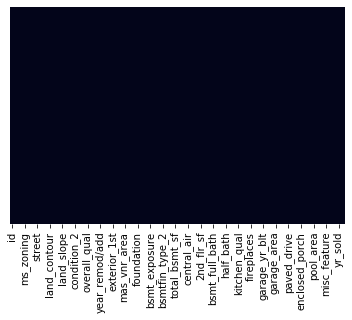

In [53]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False);

In [54]:
test_df.isnull().sum().sort_values(ascending=False).head(30)

sale_type         0
yr_sold           0
year_remod/add    0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
mas_vnr_area      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    0
bsmtfin_sf_2      0
year_built        0
overall_cond      0
overall_qual      0
lot_shape         0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage      0
lot_area          0
street            0
alley             0
dtype: int64

In [55]:
# export file
test_df.to_csv('../datasets/test_clean.csv', index=False)